In [1]:
# Dataset taken from UCI Machine Learning Repository



## Attributes
1. CRIM : per capita crime rate by town
2. ZN : proportion of residential land zoned for lots over 25,000 sq.ft
3. INDUS : proportion of non-retail business acres per town
4. CHAS : Charles River dummy variable(=1 if tract bounds river;0 otherwise)
5. NOX : nitric oxides concentration(parts per 10 million)
6. RM : average number of rooms per dwelling
7. AGE : proportion of owner-occupied units built prior to 1940
8. DIS : weighted distances to five Boston employment centers
9. RAD : index of accessibility to radial highways
10. TAX : full-value property-tax rate per ten thousand dollars
11. PTRATIO : pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT : percent of lower status of the population
14. MEDV : Median value of owner-occupied homes in $1000s

### Loading the dataset

In [2]:
# Load libraries
import numpy 
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Load dataset
filename = 'housing.csv'
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
dataset = read_csv(filename,delim_whitespace=True,names=names)

### Analyze data

In [4]:
## Descriptive statistics

#shape
print(dataset.shape)

(506, 14)


In [6]:
# types
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [7]:
# head
print(dataset.head(20))

       CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0   0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  ...  222.0     18.7  394.12   5.21  28.7
6   0.08829  12.5   7.87     0  0.524  ...  311.0     15.2  395.60  12.43  22.9
7   0.14455  12.5   7.87     0  0.524  ...  311.0     15.2  396.90  19.15  27.1
8   0.21124  12.5   7.87     0  0.524  ...  311.0     15.2  386.63  29.93  16.5
9   0.17004  12.5   7.87     0  0.524  ...  311.0     15.2  386.71  17.10  18.9
10  0.22489  12.5   7.87     0  0.524  ...  311.0     15.2  392.52  20.45  15.0
11  0.11747  12.5   7.87     0  0.524  .

In [8]:
# descriptions
set_option('precision',1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS  ...  PTRATIO      B  LSTAT   MEDV
count  5.1e+02  506.0  506.0  5.1e+02  ...    506.0  506.0  506.0  506.0
mean   3.6e+00   11.4   11.1  6.9e-02  ...     18.5  356.7   12.7   22.5
std    8.6e+00   23.3    6.9  2.5e-01  ...      2.2   91.3    7.1    9.2
min    6.3e-03    0.0    0.5  0.0e+00  ...     12.6    0.3    1.7    5.0
25%    8.2e-02    0.0    5.2  0.0e+00  ...     17.4  375.4    6.9   17.0
50%    2.6e-01    0.0    9.7  0.0e+00  ...     19.1  391.4   11.4   21.2
75%    3.7e+00   12.5   18.1  0.0e+00  ...     20.2  396.2   17.0   25.0
max    8.9e+01  100.0   27.7  1.0e+00  ...     22.0  396.9   38.0   50.0

[8 rows x 14 columns]


In [9]:
# correlations
set_option('precision',2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS  ...  PTRATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -5.59e-02  ...     0.29 -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -4.27e-02  ...    -0.39  0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  6.29e-02  ...     0.38 -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00e+00  ...    -0.12  0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  9.12e-02  ...     0.19 -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  9.13e-02  ...    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  8.65e-02  ...     0.26 -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -9.92e-02  ...    -0.23  0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -7.37e-03  ...     0.46 -0.44   0.49 -0.38
TAX      0.58 -0.31   0.72 -3.56e-02  ...     0.46 -0.44   0.54 -0.47
PTRATIO  0.29 -0.39   0.38 -1.22e-01  ...     1.00 -0.18   0.37 -0.51
B       -0.39  0.18  -0.36  4.88e-02  ...    -0.18  1.00  -0.37  0.33
LSTAT    0.46 -0.41   0.60 -5.39e-02  ...     0.37 -0.37   1.00 -0.74
MEDV    -0.39  0.36 

Interesting part is many of the attributes have a strong correlation(e.g >0.70 or <-0.70)
1. Examples
* **NOX** and **INDUS** with 0.76
* **DIS** and **INDUS** with -0.71
* **TAX** and **INDUS** with 0.72 
* **AGE** and **NOX** with 0.73
* **DIS** and **NOX** with -0.78

### Data Visualizations

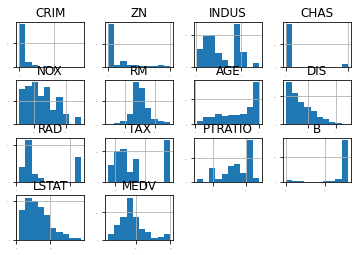

In [10]:
# Unimodal Data Visualizations

# histograms
dataset.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)
pyplot.show()

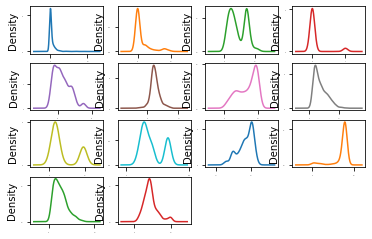

In [11]:
# density
dataset.plot(kind='density',subplots=True,layout=(4,4),sharex=False,legend=False,fontsize=1)
pyplot.show()

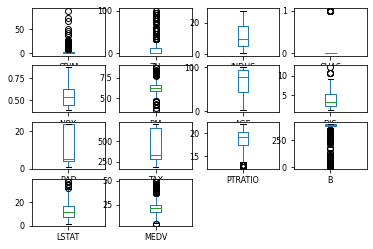

In [12]:
# box and whisker plots
dataset.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,fontsize=8)
pyplot.show()

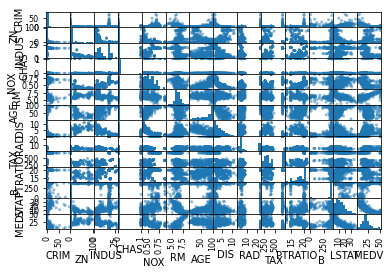

In [13]:
## Multimodal Data Visualizations

# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

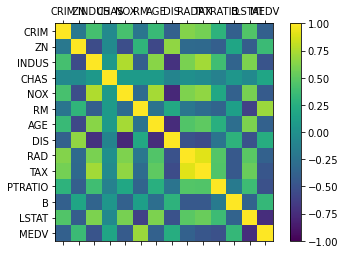

In [16]:
## correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

### Validation Dataset


In [17]:
## split-out validation dataset

array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size=validation_size,random_state=seed)


### Evaluate Algorithms

In [18]:
## Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [19]:
# Spot-check algorithms
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [20]:
# evaluate each model in turn
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -28.954299 (21.729220)
SVR: -67.824705 (32.801530)


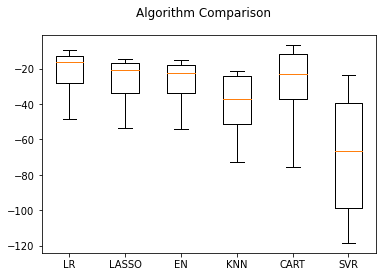

In [21]:
## comparing algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Evaluate Algorithms  : Standardization

In [24]:
# standardize the dataset
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),('SVR',SVR())])))

results = []
names = []
for name,model in pipelines:
    kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)




ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -26.248644 (16.615793)
ScaledSVR: -29.570433 (18.052964)


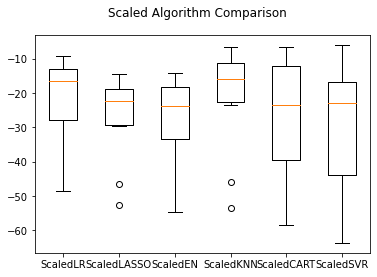

In [25]:
# compare algorithms 
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Improve results with tuning
* We see that KNN achieves good results on a scaled version of the dataset.
* But it can do better,the default value for the number of neighbors in KNN is 7.
* we can use a grid search to try a set of different numbers of neighbors and see if we can improve the score.

In [26]:
## KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(rescaledX,Y_train)
print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" %(mean,stdev,param))

Best: -19.497829 using {'n_neighbors': 1}
-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}


### Ensemble Methods
* **Boosting Methods**: AdaBoost(AB) and Gradient Boosting(GBM)
* **Bagging Methods**: Random Forests(RF) and Extra Trees(ET)

In [27]:
# ensembles 
ensembles = []
ensembles.append(('ScaledAB',Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM',Pipeline([('Scaler',StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF',Pipeline([('Scaler',StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET',Pipeline([('Scaler',StandardScaler()),('ET',ExtraTreesRegressor())])))
results = []
names = []
for name,model in ensembles:
    kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)



ScaledAB: -16.708729 (8.494477)
ScaledGBM: -10.910041 (8.709789)
ScaledRF: -12.318618 (9.521702)
ScaledET: -9.141439 (6.424760)


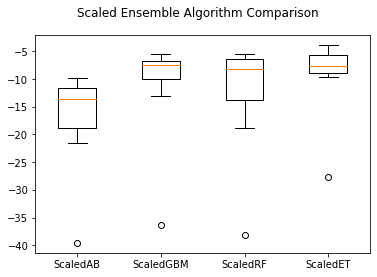

In [28]:
## compare algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Tune Ensemble Methods
* The default number of boosting stages to perform (n_estimators) is 100.
* Often the larger the number of boosting stages,the better the performance but the longer the training time.

In [32]:
## Tune Scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(rescaledX,Y_train)

print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" %(mean,stdev,param))


Best: -10.560638 using {'n_estimators': 400}
-11.629999 (8.833221) with: {'n_estimators': 50}
-11.073455 (8.772155) with: {'n_estimators': 100}
-10.838924 (8.734377) with: {'n_estimators': 150}
-10.785568 (8.657244) with: {'n_estimators': 200}
-10.654778 (8.540552) with: {'n_estimators': 250}
-10.649385 (8.497232) with: {'n_estimators': 300}
-10.589337 (8.413596) with: {'n_estimators': 350}
-10.560638 (8.353747) with: {'n_estimators': 400}


## Finalize model

In [33]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed,n_estimators=400)
model.fit(rescaledX,Y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation,predictions))

11.902132586880027


In [34]:
# close to our estimate of -9.3

# Summary
* Problem definition
* Loading the dataset
* Analyze Data (Some skewed distributions and correlated attributes)
* Evaluate Algorithms(Linear Regression looked good)
* Evaluate Algorithms with Standardization(KNN looked good)
* Algorithm Tuning(k=1 for KNN was best)
* Ensemble Methods(Bagging and Boosting,Gradient Boosting looked good)
* Tuning Ensemble Methods(getting the most from Gradient Boosting)
* Finalize Model